<a href="https://colab.research.google.com/github/lauraveul1995/Assignments/blob/main/winc_assignment_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing modules

In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# Graph 1: CO2 of the bigger countries

Making dataframes, including and excluding EU as "country"

In [2]:
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
df = tables[1]
df.columns = ["country","FCO2_1990","FCO2_2005","FCO2_2017","FCO2_2017_%world",
              "FCO2_2017_%change","FCO2_2017_landarea","FCO2_2017_percapita",
              "2018_CO2_incl_LUCF","2018_CO2_excl_LUCF"]
df1 = df.iloc[3:]

In [3]:
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
df = tables[1]
df.columns = ["country","FCO2_1990","FCO2_2005","FCO2_2017","FCO2_2017_%world",
              "FCO2_2017_%change","FCO2_2017_landarea","FCO2_2017_percapita",
              "2018_CO2_incl_LUCF","2018_CO2_excl_LUCF"]
df2 = (df.loc[(~df.country.str.contains("European"))]).iloc[3:]                 # selecting the country rows not containing (~) European, from that subset, take third to last entries

Selecting the top 5 poluters

In [4]:
top_poluters1 = df1.sort_values("FCO2_2017", ascending=False)
top_poluters1 = top_poluters1.iloc[0:5]
top_poluters1.index = top_poluters1.country

,country,FCO2_1990,FCO2_2005,FCO2_2017,FCO2_2017_%world,FCO2_2017_%change,FCO2_2017_landarea,FCO2_2017_percapita,2018_CO2_incl_LUCF,2018_CO2_excl_LUCF
country,,,,,,,,,,
China,China,2397.048,6263.064,10877.218,29.34%,353.8%,1133.0,7.7,9663.36,10313.46
United States,United States,5085.897,5971.571,5107.393,13.77%,0.4%,519.0,15.7,4749.57,4981.30
European Union,European Union,4409.339,4249.995,3548.345,9.57%,-19.5%,793.0,7.0,2636.98,2871
India,India,605.968,1210.754,2454.774,6.62%,305.1%,747.0,1.8,2400.25,2434.52
Russia,Russia,2378.921,1733.950,1764.866,4.76%,-25.8%,103.0,12.3,1049.05,1607.55


In [5]:
top_poluters2 = df2.sort_values("FCO2_2017", ascending=False)
top_poluters2 = top_poluters2.iloc[0:5]
top_poluters2.index = top_poluters2.country                                     # Setting index as country name, useful for labels in graph

,country,FCO2_1990,FCO2_2005,FCO2_2017,FCO2_2017_%world,FCO2_2017_%change,FCO2_2017_landarea,FCO2_2017_percapita,2018_CO2_incl_LUCF,2018_CO2_excl_LUCF
country,,,,,,,,,,
China,China,2397.048,6263.064,10877.218,29.34%,353.8%,1133.0,7.7,9663.36,10313.46
United States,United States,5085.897,5971.571,5107.393,13.77%,0.4%,519.0,15.7,4749.57,4981.30
India,India,605.968,1210.754,2454.774,6.62%,305.1%,747.0,1.8,2400.25,2434.52
Russia,Russia,2378.921,1733.950,1764.866,4.76%,-25.8%,103.0,12.3,1049.05,1607.55
Japan,Japan,1149.400,1276.863,1320.776,3.56%,14.9%,3494.0,10.4,1074.08,1106.15


Making a figure with the graphs 

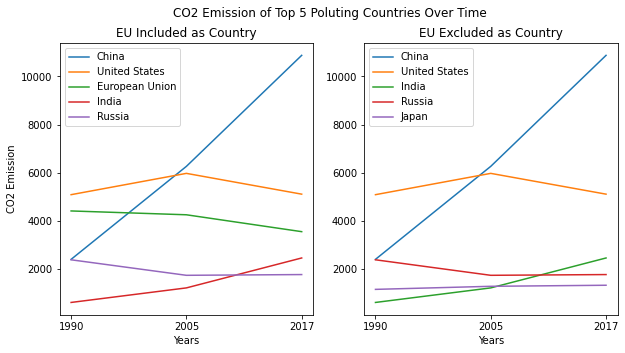

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle("CO2 Emission of Top 5 Poluting Countries Over Time")
for index, row in top_poluters1.iterrows():
  ax1.plot(top_poluters1.loc[index][1:4],label=top_poluters1.loc[index][0])
  ax1.set_ylabel("CO2 Emission")
  ax1.set_xlabel("Year")
  ax1.set_xticks([0,1,2])                                                       # FixedLocator
  ax1.set_xticklabels(["1990","2005","2017"])                                   # FixedFormatter (preventing an error)
  ax1.legend()
  ax1.set_title("EU Included as Country")
for index, row in top_poluters2.iterrows():
  ax2.plot(top_poluters2.loc[index][1:4],label=top_poluters2.loc[index][0])
  ax2.set_xlabel("Year")
  ax2.set_xticks([0,1,2])                                                       # FixedLocator
  ax2.set_xticklabels(["1990","2005","2017"])                                   # FixedFormatter (preventing an error)
  ax2.set_title("EU Excluded as Country")
  ax2.legend()

# Graph 2: worst and best changers

Creating dataframe with new columns for relative changes

In [7]:
def relative05(df1):
  return df1.FCO2_2005/df1.FCO2_1990*100
def relative17(df1):
  return df1.FCO2_2017/df1.FCO2_1990*100
df1["relative05"] = df1.apply(relative05, axis=1)
df1["relative17"] = df1.apply(relative17, axis=1)
df1["relative90"] = 100

Creating dataframes with worst and best changers 

In [8]:
best_2017 = (df1.sort_values("relative17")).iloc[0:3]                           # sort relative values ascending, selecting best 3
best_2017.index = best_2017.country                                             # changing index to country name 
worst_2017 = (df1.sort_values("relative17", ascending=False)).iloc[0:3]         # sort relative values descending, selecting worst 3
worst_2017.index = worst_2017.country                                           # changing index to country name



Creating dataframe for countries with an emission of at least 5

In [9]:
df2 = df1.loc[df1.FCO2_1990>5]

Creating dataframes with worst and best changers, for countries with an emission of at least 5

In [10]:
best_2017_5 = (df2.sort_values("relative17")).iloc[0:3]                         # sort relative values ascending, selecting best 3
best_2017_5.index = best_2017_5.country                                         # changing index to country name 
worst_2017_5 = (df2.sort_values("relative17", ascending=False)).iloc[0:3]       # sort relative values descending, selecting worst 3
worst_2017_5.index = worst_2017_5.country                                       # changing index to country name


Creating figure with plots for best and worst changers

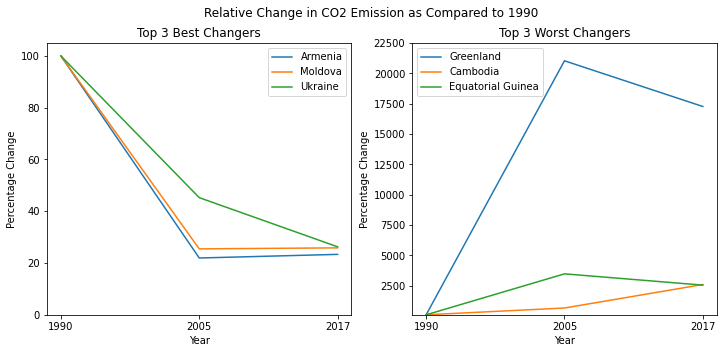

In [46]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle("Relative Change in CO2 Emission as Compared to 1990")
for index, row in best_2017.iterrows():
  ax1.plot(best_2017.loc[index][["relative90", "relative05","relative17"]],label=best_2017.loc[index][0])
ax1.set_ylim([0,105])                                                           # Setting relevant y-limits
ax1.set_xticks([0,1,2])                                                         # FixedLocator  
ax1.set_xticklabels(["1990","2005","2017"])                                     # FixedFormatter
ax1.set_xlabel("Year")
ax1.set_title("Top 3 Best Changers")
ax1.set_ylabel("Percentage Change")
ax1.legend()
for index, row in worst_2017.iterrows():
  ax2.plot(worst_2017.loc[index][["relative90", "relative05","relative17"]],label=worst_2017.loc[index][0])
ax2.set_ylim([100,22500])                                                       # Setting relevant y-limits
ax2.set_xticks([0,1,2])                                                         # FixedLocator  
ax2.set_xticklabels(["1990","2005","2017"])                                     # FixedFormatter
ax2.set_xlabel("Year")
ax2.set_title("Top 3 Worst Changers")
ax2.set_ylabel("Percentage Change")
ax2.legend(loc="upper left")

Creating figure with plots for best and worst changers,for countries with an emission of at least 5

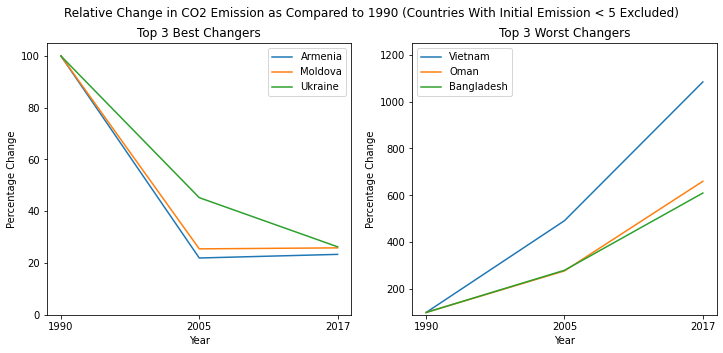

In [55]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle("Relative Change in CO2 Emission as Compared to 1990 (Countries With Initial Emission < 5 Excluded)")
for index, row in best_2017_5.iterrows():
  ax1.plot(best_2017_5.loc[index][["relative90", "relative05","relative17"]],label=best_2017_5.loc[index][0])
ax1.set_ylim([0,105])                                                           # Setting relevant y-limits
ax1.set_xticks([0,1,2])                                                         # FixedLocator  
ax1.set_xticklabels(["1990","2005","2017"])                                     # FixedFormatter
ax1.set_xlabel("Year")
ax1.set_title("Top 3 Best Changers")
ax1.set_ylabel("Percentage Change")
ax1.legend()
for index, row in worst_2017_5.iterrows():
  ax2.plot(worst_2017_5.loc[index][["relative90", "relative05","relative17"]],label=worst_2017_5.loc[index][0])
ax2.set_ylim([90,1250])                                                         # Setting relevant y-limits
ax2.set_xticks([0,1,2])                                                         # FixedLocator
ax2.set_xticklabels(["1990","2005","2017"])                                     # FixedFormatter (preventing an error)
ax2.set_xlabel("Year")
ax2.set_title("Top 3 Worst Changers")
ax2.set_ylabel("Percentage Change")
ax2.legend()